In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2
from torchvision.models import resnet18
from torch.nn import functional as F

In [2]:
import pandas as pd

In [3]:
predict_images = pd.read_csv("./data/test.csv")
predict_images

,image
0,images/18353.jpg
1,images/18354.jpg
2,images/18355.jpg
3,images/18356.jpg
4,images/18357.jpg
...,...
8795,images/27148.jpg
8796,images/27149.jpg
8797,images/27150.jpg
8798,images/27151.jpg


In [8]:
img_file = predict_images.iloc[0, 0]
img_file

'images/18353.jpg'

In [10]:
import os.path
from PIL import Image

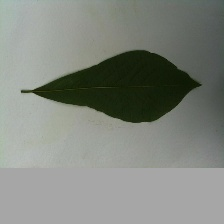

In [34]:
img = Image.open(os.path.join("./data", img_file))
img

In [17]:
v2.PILToTensor()(img)

tensor([[[160, 163, 166,  ...,  81,  78,  75],
         [160, 163, 165,  ...,  82,  79,  76],
         [164, 166, 167,  ...,  83,  80,  77],
         ...,
         [166, 166, 166,  ..., 166, 166, 166],
         [166, 166, 166,  ..., 166, 166, 166],
         [166, 166, 166,  ..., 166, 166, 166]],

        [[182, 185, 188,  ...,  93,  93,  90],
         [182, 185, 187,  ...,  94,  94,  91],
         [184, 186, 187,  ...,  95,  95,  92],
         ...,
         [166, 166, 166,  ..., 166, 166, 166],
         [166, 166, 166,  ..., 166, 166, 166],
         [166, 166, 166,  ..., 166, 166, 166]],

        [[169, 172, 176,  ...,  89,  88,  85],
         [169, 172, 175,  ...,  90,  89,  86],
         [172, 174, 176,  ...,  91,  90,  87],
         ...,
         [166, 166, 166,  ..., 166, 166, 166],
         [166, 166, 166,  ..., 166, 166, 166],
         [166, 166, 166,  ..., 166, 166, 166]]], dtype=torch.uint8)

In [18]:
aug = v2.Compose([v2.PILToTensor(), v2.ToDtype(torch.float32, scale=True)])
img_t = aug(img)
img_t.shape

torch.Size([3, 224, 224])

In [19]:
img.close()

In [20]:
def image_to_tensor(filename):
    with Image.open(os.path.join("./data", filename)) as img:
        aug = v2.Compose([v2.PILToTensor(), v2.ToDtype(torch.float32, scale=True)])
        return aug(img)

In [22]:
image_to_tensor(img_file).shape

torch.Size([3, 224, 224])

In [26]:
predict_images

,image
0,images/18353.jpg
1,images/18354.jpg
2,images/18355.jpg
3,images/18356.jpg
4,images/18357.jpg
...,...
8795,images/27148.jpg
8796,images/27149.jpg
8797,images/27150.jpg
8798,images/27151.jpg


In [28]:
test = predict_images[:2]

In [29]:
test

,image
0,images/18353.jpg
1,images/18354.jpg


In [30]:
test.map(image_to_tensor)

,image
0,"[[[tensor(0.6275), tensor(0.6392), tensor(0.65..."
1,"[[[tensor(0.7176), tensor(0.7137), tensor(0.71..."


In [31]:
test

,image
0,images/18353.jpg
1,images/18354.jpg


In [35]:
v2.PILToTensor()(img)

tensor([[[160, 163, 166,  ...,  81,  78,  75],
         [160, 163, 165,  ...,  82,  79,  76],
         [164, 166, 167,  ...,  83,  80,  77],
         ...,
         [166, 166, 166,  ..., 166, 166, 166],
         [166, 166, 166,  ..., 166, 166, 166],
         [166, 166, 166,  ..., 166, 166, 166]],

        [[182, 185, 188,  ...,  93,  93,  90],
         [182, 185, 187,  ...,  94,  94,  91],
         [184, 186, 187,  ...,  95,  95,  92],
         ...,
         [166, 166, 166,  ..., 166, 166, 166],
         [166, 166, 166,  ..., 166, 166, 166],
         [166, 166, 166,  ..., 166, 166, 166]],

        [[169, 172, 176,  ...,  89,  88,  85],
         [169, 172, 175,  ...,  90,  89,  86],
         [172, 174, 176,  ...,  91,  90,  87],
         ...,
         [166, 166, 166,  ..., 166, 166, 166],
         [166, 166, 166,  ..., 166, 166, 166],
         [166, 166, 166,  ..., 166, 166, 166]]], dtype=torch.uint8)

In [36]:
aug(img)

tensor([[[0.6275, 0.6392, 0.6510,  ..., 0.3176, 0.3059, 0.2941],
         [0.6275, 0.6392, 0.6471,  ..., 0.3216, 0.3098, 0.2980],
         [0.6431, 0.6510, 0.6549,  ..., 0.3255, 0.3137, 0.3020],
         ...,
         [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510],
         [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510],
         [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510]],

        [[0.7137, 0.7255, 0.7373,  ..., 0.3647, 0.3647, 0.3529],
         [0.7137, 0.7255, 0.7333,  ..., 0.3686, 0.3686, 0.3569],
         [0.7216, 0.7294, 0.7333,  ..., 0.3725, 0.3725, 0.3608],
         ...,
         [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510],
         [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510],
         [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510]],

        [[0.6627, 0.6745, 0.6902,  ..., 0.3490, 0.3451, 0.3333],
         [0.6627, 0.6745, 0.6863,  ..., 0.3529, 0.3490, 0.3373],
         [0.6745, 0.6824, 0.6902,  ..., 0.3569, 0.3529, 0.

In [37]:
from torch.utils.data import TensorDataset

In [39]:
test.to_numpy()

array([['images/18353.jpg'],
       ['images/18354.jpg']], dtype=object)

In [40]:
list(test)

['image']

In [41]:
test.tolist()

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [43]:
test['image'].tolist()

['images/18353.jpg', 'images/18354.jpg']

In [47]:
[image_to_tensor(f) for f in test['image'].tolist()]

[tensor([[[0.6275, 0.6392, 0.6510,  ..., 0.3176, 0.3059, 0.2941],
          [0.6275, 0.6392, 0.6471,  ..., 0.3216, 0.3098, 0.2980],
          [0.6431, 0.6510, 0.6549,  ..., 0.3255, 0.3137, 0.3020],
          ...,
          [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510],
          [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510],
          [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510]],
 
         [[0.7137, 0.7255, 0.7373,  ..., 0.3647, 0.3647, 0.3529],
          [0.7137, 0.7255, 0.7333,  ..., 0.3686, 0.3686, 0.3569],
          [0.7216, 0.7294, 0.7333,  ..., 0.3725, 0.3725, 0.3608],
          ...,
          [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510],
          [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510],
          [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510]],
 
         [[0.6627, 0.6745, 0.6902,  ..., 0.3490, 0.3451, 0.3333],
          [0.6627, 0.6745, 0.6863,  ..., 0.3529, 0.3490, 0.3373],
          [0.6745, 0.6824, 0.6902,  ...,

In [58]:
torch.stack([image_to_tensor(f) for f in test['image'].tolist()]).shape

torch.Size([2, 3, 224, 224])

In [61]:
dataset = TensorDataset(torch.stack([image_to_tensor(f) for f in predict_images['image'].tolist()]))

In [67]:
dataset.tensors[0].shape

torch.Size([8800, 3, 224, 224])

In [68]:
features = dataset.tensors[0].to('cuda')

In [73]:
from model import ResNet18_pretrained


net = ResNet18_pretrained()
net.load_state_dict(torch.load("ResNet18_pretrained-epoch_10.pt"))

/usr/lib/python3.11/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


<All keys matched successfully>

In [74]:
net.to('cuda')
net.device

device(type='cuda', index=0)

In [75]:
labels = net(features)

OutOfMemoryError: CUDA out of memory. Tried to allocate 26.32 GiB. GPU 0 has a total capacty of 8.00 GiB of which 1.41 GiB is free. Including non-PyTorch memory, this process has 17179869184.00 GiB memory in use. Of the allocated memory 4.98 GiB is allocated by PyTorch, and 20.96 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [80]:
predict_dataloader = DataLoader(dataset, batch_size=64, shuffle=False, pin_memory=True, num_workers=8)

In [81]:
batch = next(iter(predict_dataloader))

In [95]:
features = batch[0].to('cuda')

In [96]:
features.shape

torch.Size([64, 3, 224, 224])

In [136]:
labels = net(features)

In [137]:
labels = labels.argmax(axis=1)

In [103]:
dataset = ImageFolder("./data/images_train/",
                       v2.Compose([v2.PILToTensor(), v2.ToDtype(torch.float32, scale=True)]))

In [104]:
label_map = {v: k for k, v in dataset.class_to_idx.items()}

In [139]:
def get_label(i): return label_map[int(i)]

In [145]:
predict_list = [label_map[i] for i in labels.tolist()]

In [146]:
len(predict_list)

64

In [147]:
pd.Series(predict_list)

0              asimina_triloba
1        populus_grandidentata
2          platanus_acerifolia
3               pinus_bungeana
4          platanus_acerifolia
                ...           
59               tilia_cordata
60    broussonettia_papyrifera
61           quercus_michauxii
62               quercus_robur
63         populus_tremuloides
Length: 64, dtype: object

In [5]:
predict_images.shape

(8800, 1)

In [16]:
labels = pd.Series(torch.randn(8800), name="label")
labels

0      -2.794153
1      -1.487519
2       0.594684
3       0.320552
4       0.940046
          ...   
8795    0.278221
8796    1.419098
8797   -0.779517
8798   -0.351366
8799   -1.009606
Name: label, Length: 8800, dtype: float32

In [18]:
labels.shape

(8800,)

In [20]:
pd.concat([predict_images, labels], axis=1)

,image,label
0,images/18353.jpg,-2.794153
1,images/18354.jpg,-1.487519
2,images/18355.jpg,0.594684
3,images/18356.jpg,0.320552
4,images/18357.jpg,0.940046
...,...,...
8795,images/27148.jpg,0.278221
8796,images/27149.jpg,1.419098
8797,images/27150.jpg,-0.779517
8798,images/27151.jpg,-0.351366
